In [1]:
# data analysis and wrangling

import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [2]:
df_global_hunger_index = pd.read_csv("/kaggle/input/global-hunger-index-2022-datasets/GHI2022 scores.csv", encoding= 'unicode_escape')
df_child_undernourished = pd.read_csv("/kaggle/input/global-hunger-index-2022-datasets/Proportion of undernourished in the population.csv", encoding= 'unicode_escape')
df_child_wasting = pd.read_csv("/kaggle/input/global-hunger-index-2022-datasets/Prevalence of wasting in children under five years.csv", encoding= 'unicode_escape')
df_child_stunting = pd.read_csv("/kaggle/input/global-hunger-index-2022-datasets/Prevalence of stunting in children under five years.csv", encoding= 'unicode_escape')
df_child_mortality = pd.read_csv("/kaggle/input/global-hunger-index-2022-datasets/Under-five mortality rate.csv", encoding= 'unicode_escape')

# **Understanding the datasets**

In [3]:
df_global_hunger_index.head()

,Country,2000,2007,2014,2022,Absolute change since 2014,% change since 2014
0,Afghanistan,50.3,38.7,30.6,29.9,-0.7,-2.3
1,Albania,20.7,15.8,9.2,6.2,-3.0,-32.6
2,Algeria,14.5,11.4,8.7,6.9,-1.8,-20.7
3,Angola,64.9,44.7,26.2,25.9,-0.3,-1.1
4,Argentina,6.6,5.5,5.0,6.8,1.8,36.0


In [4]:
df_global_hunger_index.drop("Absolute change since 2014", inplace=True, axis=1)
df_global_hunger_index.drop("% change since 2014", inplace=True, axis=1)
df_global_hunger_index

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1
134,Zambia,53.3,46.0,35.2,29.3


In [5]:
df_child_undernourished.head()

,Country,2000,2007,2014,2022
0,Afghanistan,47.8,29.8,20.7,29.8
1,Albania,4.9,8.3,5.0,3.9
2,Algeria,8.0,5.9,2.9,2.0
3,Angola,67.5,46.1,13.7,20.8
4,Argentina,3.0,3.3,2.0,3.7


In [6]:
df_child_wasting.head()

,Country,2000,2007,2014,2022
0,Afghanistan,10.9,8.3,9.5,5.1
1,Albania,12.2,8.5,4.5,1.6
2,Algeria,3.1,4.1,4.1,2.7
3,Angola,11.2,8.2,4.9,6.1
4,Argentina,1.7,1.2,1.6,2.7


In [7]:
df_child_stunting.head()

,Country,2000,2007,2014,2022
0,Afghanistan,50.6,51.1,40.4,38.2
1,Albania,39.2,25.0,15.2,11.3
2,Algeria,23.6,15.4,11.7,9.8
3,Angola,46.7,29.2,37.6,29.8
4,Argentina,10.5,8.2,8.3,12.3


In [8]:
df_child_mortality.head()

,Country,2000,2007,2014,2022
0,Afghanistan,12.9,10.0,7.4,5.8
1,Albania,2.7,1.7,1.0,1.0
2,Algeria,4.0,3.1,2.5,2.3
3,Angola,20.4,14.7,9.3,7.1
4,Argentina,2.0,1.6,1.2,0.9


**Check Null Values**

In [9]:
df_global_hunger_index.isnull().sum()

Country     0
2000       19
2007       16
2014       15
2022       15
dtype: int64

**Remove null values**

In [10]:
df_global_hunger_index.dropna()

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
130,Uzbekistan,24.2,15.4,8.3,5.6
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1


**Check duplicate values**

In [11]:
df_global_hunger_index.duplicated().sum()

0

**Let's see summary statistics of our dataset by applying describe()**

In [12]:
df_global_hunger_index.describe()

,2000,2007,2014,2022
count,117.000000,120.000000,121.000000,121.000000
mean,24.676068,20.401667,16.276860,15.220661
std,14.934452,12.819451,10.711231,10.307375
min,3.000000,3.000000,3.000000,3.000000
25%,11.600000,8.725000,7.400000,6.800000
50%,20.900000,18.000000,13.000000,13.200000
75%,37.000000,30.925000,25.500000,21.700000
max,64.900000,51.100000,44.600000,45.100000


**Countries do we have in our dataset**

In [13]:
df_countries = df_global_hunger_index['Country'].unique()
df_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Benin', 'Bhutan', 'Bolivia (Plurinat. State of)',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Republic of)', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Dem. Rep. of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea (DPR)',
       'Kuwait', 'Kyrgyzstan', 'Lao PDR', 'Latvia', 'Le

**Columns do we have**

In [14]:
df_global_hunger_index.columns

Index(['Country', '2000', '2007', '2014', '2022'], dtype='object')

Using dictionary to convert specific columns 

In [15]:
# df_global_hunger_index["2000"] = df_global_hunger_index['2000'].str.replace('—', '').astype(float)

In [16]:
# # using apply method
# df_global_hunger_index[['2000', '2007', '2014', '2022']] = df_global_hunger_index[['2000', '2007', '2014', '2022']].apply(pd.to_numeric)
# print(df_global_hunger_index.dtypes)

In [17]:
convert_dict = {'2000': float,
                '2007': float,
                '2014': float,
                '2022': float
                }

In [18]:
df_global_hunger_index = df_global_hunger_index.astype(convert_dict)
print(df_global_hunger_index.dtypes)

Country     object
2000       float64
2007       float64
2014       float64
2022       float64
dtype: object


**Visualization**

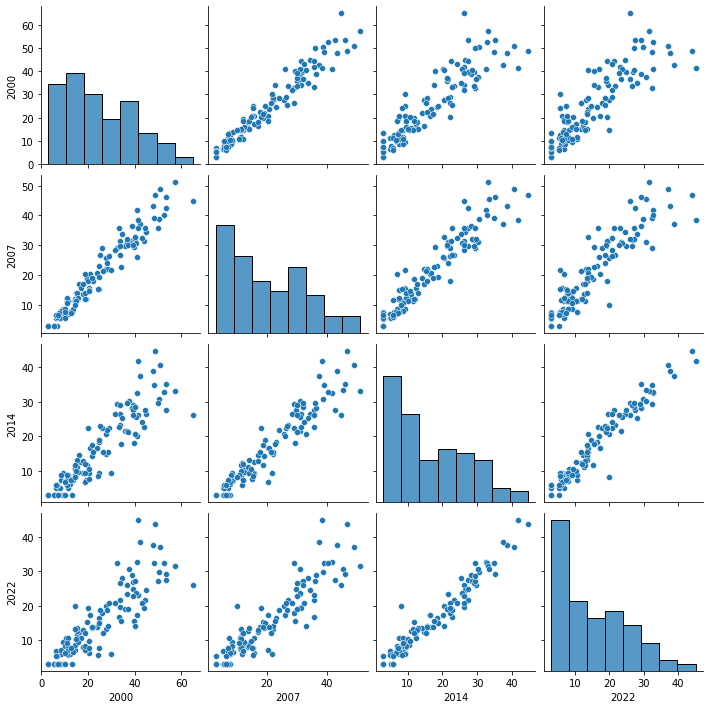

In [19]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df_global_hunger_index)

# **Data Analysis** 

**How many countries do we have in our dtasets**

In [20]:
Countries = df_global_hunger_index["Country"].unique()
Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Benin', 'Bhutan', 'Bolivia (Plurinat. State of)',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Republic of)', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Dem. Rep. of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea (DPR)',
       'Kuwait', 'Kyrgyzstan', 'Lao PDR', 'Latvia', 'Le

In [21]:
Number_countries = df_global_hunger_index["Country"].unique().size
Number_countries

136

Very good, it looks like we have enough countries to do our analysis and prediction.

**Global Hunger Index distribution plot between 2000 to 2022**

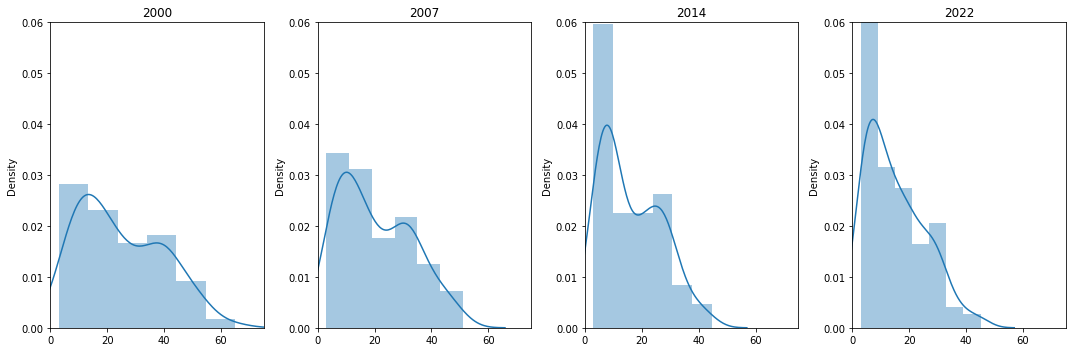

In [22]:
col=["2000","2007","2014","2022"]
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    plt.title(col[i])
    sns.distplot(df_global_hunger_index,x=df_global_hunger_index[col[i]])
    plt.xlim([0,75])
    plt.ylim([0,0.06])
plt.tight_layout()
plt.show()

In [23]:
df_GHI=df_global_hunger_index

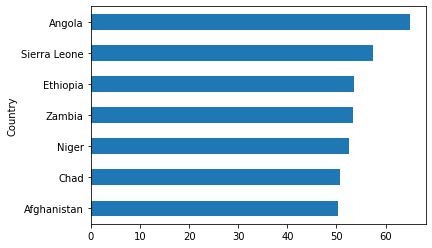

In [24]:
df_GHI[df_GHI["2000"]>=50].sort_values(by="2000",ascending=True).plot.barh(y="2000",x='Country',legend=False);

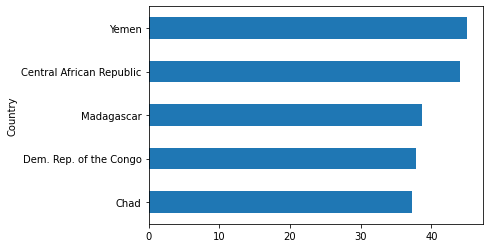

In [25]:
df_GHI[df_GHI["2022"]>=35].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=False);

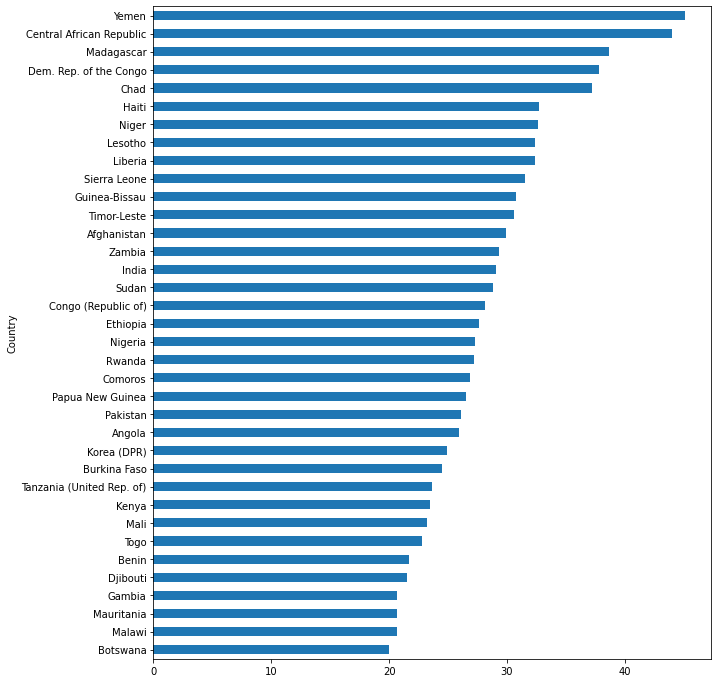

In [26]:
df_GHI[df_GHI["2022"]>=20].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=False,figsize=(10, 12) );

**Let's see countries in Low and Modelate categories**

In [27]:
((df_GHI["2022"] > 20) & (df_GHI["2022"] < 35)).sum()

30

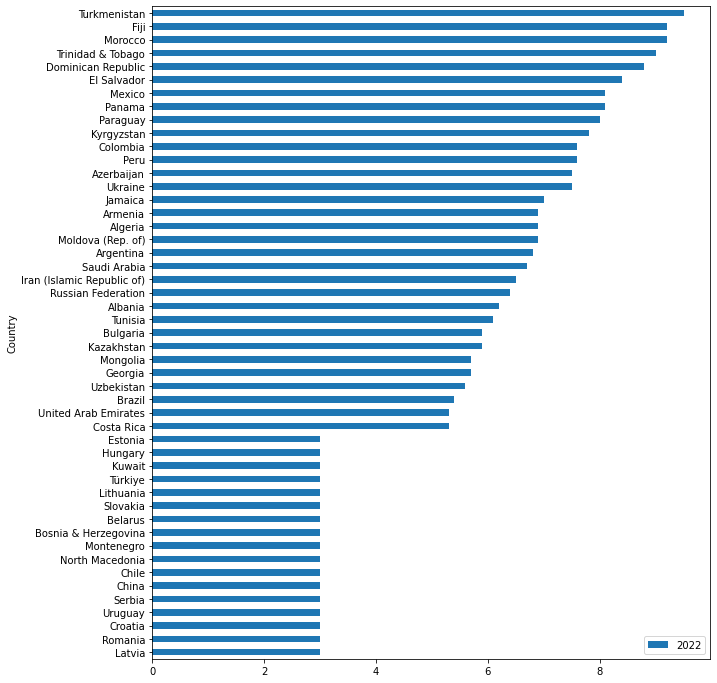

In [28]:
df_GHI[df_GHI["2022"]< 10].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=True, figsize=(10, 12));
#plt.figure(figsize=(12, 50))

In [29]:
(df_GHI["2022"] < 10).sum()

49

Only 49 countries in world are in low category in 2022.

In [30]:
Low_Countries = df_GHI.where (df_GHI["2022"] < 10)
Low_Countries = Low_Countries.dropna()
Low_Countries

,Country,2000,2007,2014,2022
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
4,Argentina,6.6,5.5,5.0,6.8
5,Armenia,19.3,12.1,7.3,6.9
6,Azerbaijan,24.9,15.3,9.3,7.5
9,Belarus,3.0,3.0,3.0,3.0
13,Bosnia & Herzegovina,9.3,6.6,3.0,3.0
15,Brazil,11.4,7.1,5.0,5.4
16,Bulgaria,8.6,7.9,7.4,5.9
24,Chile,3.0,3.0,3.0,3.0


**UN target in 2021 is to achieve GHI of 18.2 for all countries**

**How many countries are above the target in 2022?**

The target in 2022 is that at least all countries should have GHI of 18.2.

In [31]:
High_Countries = df_GHI.where (df_GHI["2022"] > 18.2)
High_Countries = High_Countries.dropna()
High_Countries

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
3,Angola,64.9,44.7,26.2,25.9
8,Bangladesh,33.9,31.3,26.3,19.6
10,Benin,33.8,26.9,23.2,21.7
14,Botswana,27.7,25.8,20.5,20.0
17,Burkina Faso,44.9,34.5,26.5,24.5
21,Cameroon,35.8,29.9,21.4,18.9
22,Central African Republic,48.8,46.8,44.6,44.0
23,Chad,50.7,49.0,40.7,37.2
27,Comoros,39.5,31.7,29.1,26.9


In [32]:
High_Countries["2022"].count()

42

# **Linear Regression Model**

In [33]:
df_child_stunting.drop("Country", inplace=True, axis=1)
df_child_wasting.drop("Country", inplace=True, axis=1)
#df_child_stunting.drop("Country", inplace=True, axis=1)
df_child_mortality.drop("Country", inplace=True, axis=1)

In [34]:
df_global_hunger_index.rename(columns={'2000':'GHI2000','2007': 'GHI2007', '2014':'GHI2014','2022':'GHI2022' }, inplace=True)
#f_global_hunger_index.head()
df_child_undernourished.rename(columns={'2000':'Nouri2000', '2007':'Nouri2007', '2014': 'Nouri2014','2022':'Nouri2022' }, inplace=True)
df_child_wasting.rename(columns={'2000':'wast2000','2007':'wast2007', '2014': 'wast2014','2022':'wast2022' }, inplace=True)
df_child_stunting.rename(columns={'2000':'stunt2000', '2007':'stunt2007', '2014': 'stunt2014','2022':'stunt2022' }, inplace=True)
df_child_mortality.rename(columns={'2000':'Morta2000', '2007':'Morta2007', '2014': 'Morta2014','2022':'Morta2022' }, inplace=True)

In [35]:
# frames = [df_global_hunger_index, df_child_undernourished, df_child_wasting, df_child_stunting, df_child_mortality]

# df = pd.concat(frames)
df = pd.concat([df_global_hunger_index, df_child_undernourished, df_child_wasting, df_child_stunting, df_child_mortality], axis=1)
df.head()

,Country,GHI2000,GHI2007,GHI2014,GHI2022,Country,Nouri2000,Nouri2007,Nouri2014,Nouri2022,...,wast2014,wast2022,stunt2000,stunt2007,stunt2014,stunt2022,Morta2000,Morta2007,Morta2014,Morta2022
0,Afghanistan,50.3,38.7,30.6,29.9,Afghanistan,47.8,29.8,20.7,29.8,...,9.5,5.1,50.6,51.1,40.4,38.2,12.9,10.0,7.4,5.8
1,Albania,20.7,15.8,9.2,6.2,Albania,4.9,8.3,5.0,3.9,...,4.5,1.6,39.2,25.0,15.2,11.3,2.7,1.7,1.0,1.0
2,Algeria,14.5,11.4,8.7,6.9,Algeria,8.0,5.9,2.9,2.0,...,4.1,2.7,23.6,15.4,11.7,9.8,4.0,3.1,2.5,2.3
3,Angola,64.9,44.7,26.2,25.9,Angola,67.5,46.1,13.7,20.8,...,4.9,6.1,46.7,29.2,37.6,29.8,20.4,14.7,9.3,7.1
4,Argentina,6.6,5.5,5.0,6.8,Argentina,3.0,3.3,2.0,3.7,...,1.6,2.7,10.5,8.2,8.3,12.3,2.0,1.6,1.2,0.9


In [36]:
df = df.fillna(df.mean())
#df.fillna(value=0, inplace=True)
#df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    136 non-null    object 
 1   GHI2000    117 non-null    float64
 2   GHI2007    120 non-null    float64
 3   GHI2014    121 non-null    float64
 4   GHI2022    121 non-null    float64
 5   Country    136 non-null    object 
 6   Nouri2000  121 non-null    float64
 7   Nouri2007  121 non-null    float64
 8   Nouri2014  121 non-null    float64
 9   Nouri2022  121 non-null    float64
 10  wast2000   132 non-null    float64
 11  wast2007   133 non-null    float64
 12  wast2014   132 non-null    float64
 13  wast2022   132 non-null    float64
 14  stunt2000  132 non-null    float64
 15  stunt2007  133 non-null    float64
 16  stunt2014  132 non-null    float64
 17  stunt2022  132 non-null    float64
 18  Morta2000  136 non-null    float64
 19  Morta2007  136 non-null    float64
 20  Morta2014 

In [38]:
df.corr()

,GHI2000,GHI2007,GHI2014,GHI2022,Nouri2000,Nouri2007,Nouri2014,Nouri2022,wast2000,wast2007,wast2014,wast2022,stunt2000,stunt2007,stunt2014,stunt2022,Morta2000,Morta2007,Morta2014,Morta2022
GHI2000,1.000000,0.971320,0.910196,0.870088,0.867400,0.813191,0.701081,0.684722,0.679568,0.602768,0.527466,0.482778,0.878389,0.888129,0.875248,0.827891,0.905884,0.865045,0.835920,0.813840
GHI2007,0.971320,1.000000,0.953931,0.916964,0.843773,0.849397,0.762200,0.742733,0.662511,0.677788,0.581806,0.529936,0.857286,0.897853,0.884627,0.847590,0.883930,0.869859,0.857296,0.841136
GHI2014,0.910196,0.953931,1.000000,0.975957,0.742151,0.776683,0.834867,0.820469,0.671267,0.657394,0.634636,0.567644,0.838797,0.879143,0.905995,0.889425,0.835162,0.840847,0.849522,0.847075
GHI2022,0.870088,0.916964,0.975957,1.000000,0.715811,0.751060,0.838418,0.875887,0.629785,0.616522,0.590449,0.565054,0.794285,0.838984,0.873479,0.892803,0.806332,0.817474,0.829523,0.834429
Nouri2000,0.867400,0.843773,0.742151,0.715811,1.000000,0.925127,0.715905,0.681345,0.411116,0.395297,0.295964,0.270468,0.684112,0.707255,0.684616,0.641385,0.685280,0.635903,0.612271,0.589969
Nouri2007,0.813191,0.849397,0.776683,0.751060,0.925127,1.000000,0.835419,0.779693,0.368846,0.368775,0.283618,0.249074,0.658142,0.676887,0.661407,0.622843,0.655371,0.606275,0.594520,0.579789
Nouri2014,0.701081,0.762200,0.834867,0.838418,0.715905,0.835419,1.000000,0.945901,0.350342,0.329557,0.261540,0.223103,0.629761,0.657831,0.660506,0.666251,0.599203,0.574898,0.587874,0.592733
Nouri2022,0.684722,0.742733,0.820469,0.875887,0.681345,0.779693,0.945901,1.000000,0.341469,0.330399,0.266948,0.228619,0.596232,0.629174,0.650772,0.673964,0.617128,0.606862,0.619455,0.626632
wast2000,0.679568,0.662511,0.671267,0.629785,0.411116,0.368846,0.350342,0.341469,1.000000,0.812735,0.812651,0.801080,0.548944,0.575927,0.593770,0.562876,0.548303,0.557436,0.562444,0.559965
wast2007,0.602768,0.677788,0.657394,0.616522,0.395297,0.368775,0.329557,0.330399,0.812735,1.000000,0.866742,0.833750,0.504031,0.567866,0.568818,0.539293,0.476182,0.497730,0.516918,0.508299


In [39]:
# sns.pairplot(y_vars = "GHI2022", x_vars = "Nouri2022" ,data = df)
# sns.pairplot(y_vars = "GHI2022", x_vars = "wast2022" ,data = df)
# sns.pairplot(y_vars = "GHI2022", x_vars = "stunt2022" ,data = df)
# sns.pairplot(y_vars = "GHI2022", x_vars = "Morta2022" ,data = df)

In [40]:
X = df[['Nouri2022', 'wast2022', 'stunt2022', 'Morta2022']]
#y = df['Year'].where(df['Year'] > 2000)
y = df['GHI2022']

In [41]:
X = X.dropna()
X

,Nouri2022,wast2022,stunt2022,Morta2022
0,29.8,5.1,38.2,5.8
1,3.9,1.6,11.3,1.0
2,2.0,2.7,9.8,2.3
3,20.8,6.1,29.8,7.1
4,3.7,2.7,12.3,0.9
...,...,...,...,...
130,2.0,1.8,10.8,1.4
131,22.9,5.0,22.2,2.4
132,5.7,5.2,19.6,2.1
133,41.4,16.1,55.5,6.0


In [42]:
y = y.dropna()
y

0      29.9
1       6.2
2       6.9
3      25.9
4       6.8
       ... 
130     5.6
131    19.9
132    11.9
133    45.1
134    29.3
Name: GHI2022, Length: 121, dtype: float64

In [43]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [44]:
predictedGHI = regr.predict([[1, 0, 1, 0]])
predictedGHI

array([0.37527022])